<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1000 non-null   float64
 1   High    1000 non-null   float64
 2   Low     1000 non-null   float64
 3   Volume  1000 non-null   float64
 4   Close   1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None
               Open          High           Low       Volume         Close
count   1000.000000   1000.000000   1000.000000  1000.000000   1000.000000
mean    9206.174250   9211.647550   9200.788230     5.385762   9206.719040
std    15594.576165  15603.762011  15587.043575    16.897520  15596.996799
min        4.550000      4.550000      4.550000     0.000000      4.550000
25%      276.345000    276.695000    276.185000     0.020311    276.575000
50%     1151.485000   1151.485000   1151.160000     0.684446   1151.160000
75%     9370.022500   9376.725000   9337.162500     3.937936   93

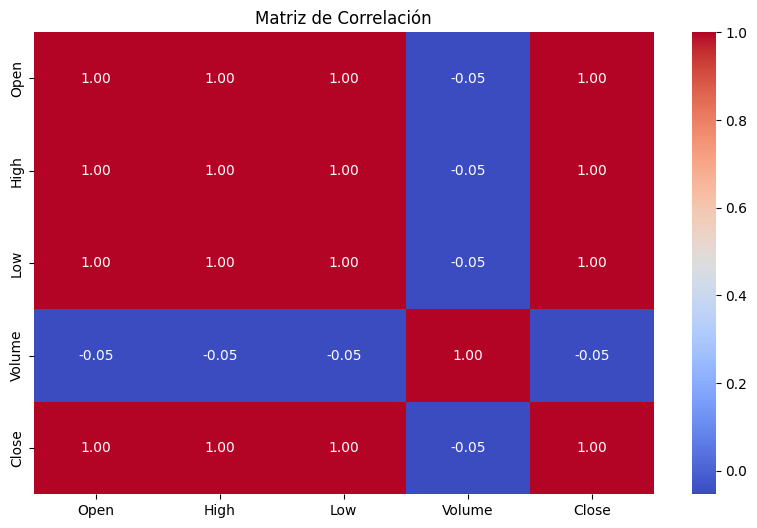

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del dataset reducido
file_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/data_sample/bitcoin_train_reduced.csv"

# Cargar el dataset
df = pd.read_csv(file_path)

# Información general del dataset
print(df.info())
print(df.describe())

# Visualización de la correlación
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.savefig("../img/correlation_matrix.png")
plt.show()


In [3]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 📌 Cargar el dataset
file_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/data_sample/bitcoin_sample.csv"
df = pd.read_csv(file_path)

# 📌 Verificar que la columna 'Close' existe
if "Close" not in df.columns:
    print("❌ Error: La columna 'Close' no está en el dataset.")
else:
    print("✅ Dataset cargado correctamente.")

# 📌 Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Close"])
y = df["Close"]

# 📌 Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 📌 Crear el pipeline con un modelo basado en árboles
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# 📌 Entrenar el modelo
print("⏳ Entrenando el modelo...")
pipeline.fit(X_train, y_train)
print("✅ Entrenamiento completado.")

# 📌 Guardar el modelo entrenado
model_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl"
joblib.dump(pipeline, model_path)
print(f"✅ Modelo guardado en: {model_path}")


✅ Dataset cargado correctamente.
⏳ Entrenando el modelo...
✅ Entrenamiento completado.
✅ Modelo guardado en: C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl


In [4]:
import joblib

# 📌 Definir la ruta del modelo guardado
model_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl"

try:
    pipeline = joblib.load(model_path)
    print("✅ Modelo cargado correctamente.")
except FileNotFoundError:
    print(f"❌ No se encontró el modelo en: {model_path}. Asegúrate de haberlo entrenado y guardado.")


✅ Modelo cargado correctamente.


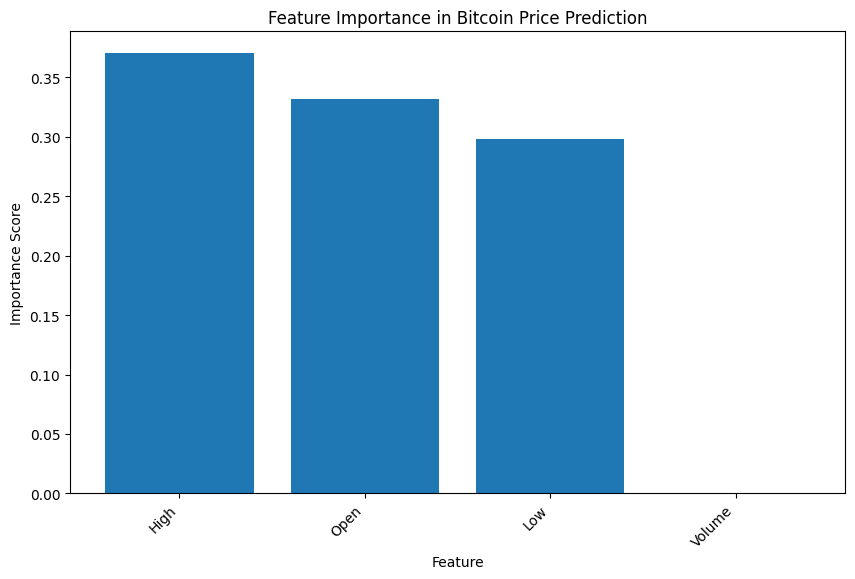

✅ Gráfica guardada en: src/img/feature_importance.png


<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 📌 Obtener importancia de características del modelo
model = pipeline.named_steps["model"]

if hasattr(model, "feature_importances_"):
    feature_importance = model.feature_importances_
    feature_names = X_train.columns  # Asegurar que X_train esté disponible

    # 📊 Crear la gráfica
    plt.figure(figsize=(10,6))
    indices = np.argsort(feature_importance)[::-1]
    plt.bar(range(len(feature_names)), feature_importance[indices], align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=45, ha="right")
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.title("Feature Importance in Bitcoin Price Prediction")
    plt.show()

    # 📌 Guardar la imagen
    plt.savefig("C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/img/feature_importance.png", bbox_inches="tight")
    print("✅ Gráfica guardada en: src/img/feature_importance.png")
else:
    print("⚠️ El modelo seleccionado no tiene importancia de características.")


In [7]:
import pandas as pd

# 📌 Cargar el dataset de prueba
test_file = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/data_sample/bitcoin_sample.csv"
df_test = pd.read_csv(test_file)

# 📌 Verificar nombres de las columnas
print("🔍 Columnas en el dataset:", df_test.columns)

# 📌 Extraer características y variable objetivo
if "Close" in df_test.columns:
    X_test = df_test.drop(columns=["Close"])  # Características
    y_test = df_test["Close"]  # Variable objetivo
    print("✅ Datos de prueba cargados correctamente.")
else:
    print("❌ La columna 'Close' no está en el dataset. Verifica los nombres de las columnas.")


🔍 Columnas en el dataset: Index(['Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')
✅ Datos de prueba cargados correctamente.


In [8]:
import joblib

# 📌 Cargar el modelo guardado
model_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl"

try:
    pipeline = joblib.load(model_path)
    print("✅ Modelo cargado correctamente.")
except FileNotFoundError:
    print(f"❌ No se encontró el modelo en: {model_path}. Asegúrate de haberlo entrenado y guardado.")

# 📌 Generar predicciones si el modelo está disponible
if 'pipeline' in locals():
    y_pred = pipeline.predict(X_test)
    print("✅ Predicciones generadas correctamente.")
else:
    print("❌ No se puede generar `y_pred` porque el modelo no está disponible.")


✅ Modelo cargado correctamente.
✅ Predicciones generadas correctamente.


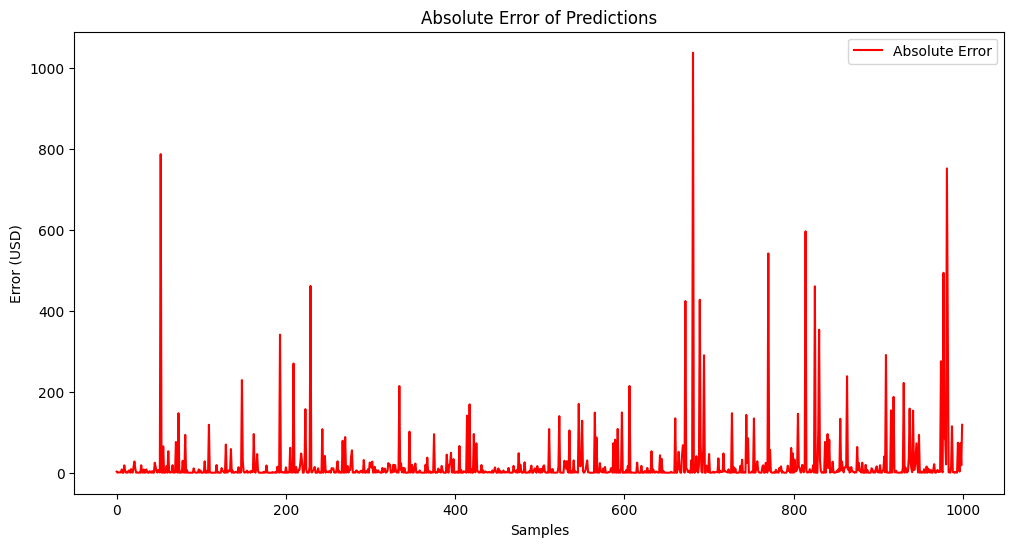

✅ Gráfica guardada en: src/img/error_analysis.png


<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 📌 Verificar si las predicciones y los valores reales existen
if 'y_test' in locals() and 'y_pred' in locals():
    error = np.abs(y_test.values - y_pred)  # Error absoluto

    # 📊 Gráfico de error absoluto
    plt.figure(figsize=(12,6))
    plt.plot(error, label="Absolute Error", color="red")
    plt.xlabel("Samples")
    plt.ylabel("Error (USD)")
    plt.title("Absolute Error of Predictions")
    plt.legend()
    plt.show()

    # 📌 Guardar imagen para la presentación
    plt.savefig("C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/img/error_analysis.png", bbox_inches="tight")
    print("✅ Gráfica guardada en: src/img/error_analysis.png")
else:
    print("❌ No se puede graficar porque `y_test` o `y_pred` no están disponibles.")
